Data awal:
    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year origin                       name  
0          70    usa  chevrolet chevelle malibu  
1          70    usa          buick skylark 320  
2          70    usa         plymouth satellite  
3          70    usa              amc rebel sst  
4          70    usa                ford torino  

Info data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 

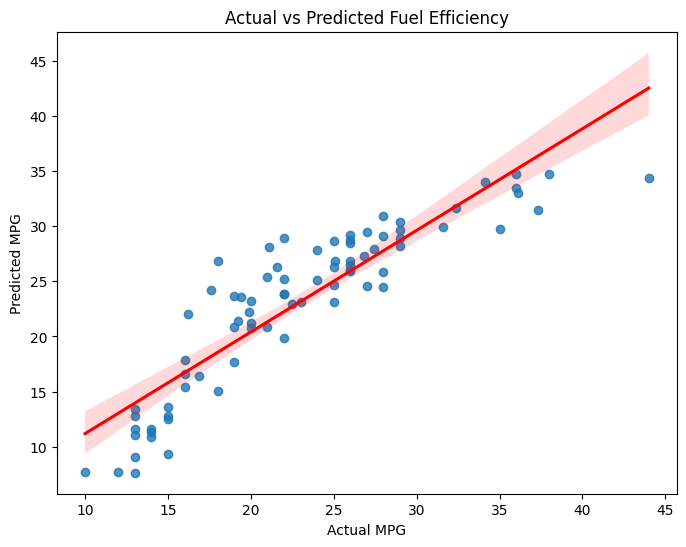

In [6]:
# ========== 1. IMPORT LIBRARY ==========
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# ========== 2. LOAD DATASET ==========
# Dataset Auto MPG tersedia langsung dari seaborn
df = sns.load_dataset('mpg')

print("Data awal:")
print(df.head())
print("\nInfo data:")
print(df.info())

# ========== 3. DATA PREPROCESSING (CLEANING) ==========
# Convert horsepower to numeric (some entries may be non-numeric) then drop missing rows
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')

# Menghapus baris yang memiliki nilai NaN (missing)
df = df.dropna()

# Pastikan tidak ada duplikat
df = df.drop_duplicates()

# Ubah kolom 'origin' menjadi kategori dan buat dummy variables
df['origin'] = df['origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})
df = pd.get_dummies(df, columns=['origin'], drop_first=True)
print(df.columns)

# Tentukan nama kolom origin yang dihasilkan secara dinamis (compat dengan berbagai versi nama)
origin_cols = [c for c in df.columns if c.startswith('origin_')]
print("Origin dummy columns:", origin_cols)

# ========== 4. PILIH FITUR DAN TARGET ==========
feature_cols = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year'] + origin_cols
X = df[feature_cols]
y = df['mpg']

# ========== 5. NORMALISASI DATA ==========
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ========== 6. SPLIT DATA (TRAIN/TEST) ==========
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# ========== 7. TRAINING MODEL ==========
model = LinearRegression()
model.fit(X_train, y_train)

# ========== 8. PREDIKSI ==========
y_pred = model.predict(X_test)

# ========== 9. EVALUASI MODEL ==========
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\n=== Model Evaluation ===")
print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")
print(f"R² Score: {r2:.3f}")

# ========== 10. INTERPRETASI KOEFISIEN ==========
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

print("\n=== Coefficients (Feature Importance) ===")
print(coefficients)

# ========== 11. VISUALISASI ==========
plt.figure(figsize=(8,6))
sns.regplot(x=y_test, y=y_pred, line_kws={"color": "red"})
plt.xlabel("Actual MPG")
plt.ylabel("Predicted MPG")
plt.title("Actual vs Predicted Fuel Efficiency")
plt.show()
